In [53]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

### Reading csv file

In [54]:
train_data = pd.read_csv('./Multi_Label_dataset/Multi_Label_dataset/extraTrain.csv')
train_data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0084058,"['Drama', 'Romance']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,tt0084867,"['Action', 'Crime', 'Thriller']",1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,tt0085121,"['Crime', 'Drama', 'Thriller']",0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,tt0085154,"['Drama', 'Romance', 'Sport']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
4,tt0085159,['Horror'],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
train_data.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [56]:
train_images = []
for i in tqdm(range(train_data.shape[0])):
    img = image.load_img('./Multi_Label_dataset/Multi_Label_dataset/extraImages/'+train_data['Id'][i]+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_images.append(img)
X = np.array(train_images)

100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [00:01<00:00, 50.55it/s]


In [57]:
X.shape

(101, 400, 400, 3)

### Display one image

"['Horror']"

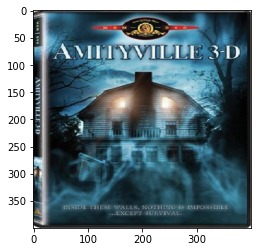

In [58]:
plt.imshow(X[4])
train_data['Genre'][4]

In [59]:
y = np.array(train_data.drop(['Id', 'Genre'], axis = 1))
y.shape

(101, 25)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42, test_size=0.1)

### Model training

In [61]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu', input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

In [62]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 93, 93, 64)       

In [63]:
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10
2/2 [==============================] - 22s 7s/step - loss: 0.7341 - accuracy: 0.0222 - val_loss: 0.6858 - val_accuracy: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 18s 6s/step - loss: 0.6694 - accuracy: 0.0111 - val_loss: 0.6815 - val_accuracy: 0.0909
Epoch 3/10
2/2 [==============================] - 18s 5s/step - loss: 0.6582 - accuracy: 0.0444 - val_loss: 0.6341 - val_accuracy: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 18s 6s/step - loss: 0.6187 - accuracy: 0.0444 - val_loss: 0.6019 - val_accuracy: 0.1818
Epoch 5/10
2/2 [==============================] - 21s 6s/step - loss: 0.5914 - accuracy: 0.0111 - val_loss: 0.6095 - val_accuracy: 0.1818
Epoch 6/10
2/2 [==============================] - 18s 5s/step - loss: 0.5798 - accuracy: 0.0444 - val_loss: 0.5873 - val_accuracy: 0.0000e+00
Epoch 7/10
2/2 [==============================] - 17s 5s/step - loss: 0.5769 - accuracy: 0.0778 - val_loss: 0.5623 - val_accuracy: 0.0000e+00
Epoch 8/10
2/2 [==

### Prediction

In [65]:
img = image.load_img('avengers.jpeg', target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

Drama (0.521)
Thriller (0.516)
News (0.436)


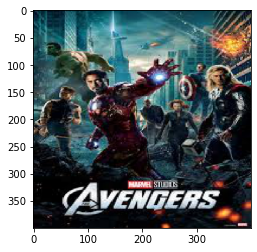

In [66]:
classes = np.array(train_data.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print('{}'.format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [71]:
img = image.load_img('kahaani2.jpg', target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

Drama (0.518)
Thriller (0.514)
News (0.441)


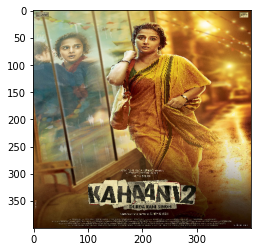

In [72]:
classes = np.array(train_data.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print('{}'.format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

###### code available at : https://www.analyticsvidhya.com/blog/2019/04/build-first-multi-label-image-classification-model-python/